In [16]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
# import the dataset
df = pd.read_csv("students by age.csv",delimiter=';',encoding='cp1251')
df

,age,name,man,woman
0,моложе 15 лет,Алтайский край,0,0
1,моложе 15 лет,Амурская область,0,0
2,моложе 15 лет,Архангельская область,0,0
3,моложе 15 лет,Астраханская область,0,0
4,моложе 15 лет,Белгородская область,1,0
...,...,...,...,...
1591,40 лет и старше,Чеченская Республика,193,130
1592,40 лет и старше,Чувашская Республика,637,683
1593,40 лет и старше,Чукотский автономный округ,4,2
1594,40 лет и старше,Ямало-Ненецкий автономный округ,15,1


In [3]:
# defining two arrays with the name of the unique age groups and the unique regions
ages = df.age.unique()
regions= df.name.unique()

In [4]:
# taking the first three columns of the dataset into a numpy array
X_men = df.iloc[:,[0,1,2]].values
# defining a dictionary with the key "age" which contains an array of the required age groups for
# this study (15-29)
d_men ={"age": np.linspace(15,29,15)}
# adding empty keys to the dictionary each key represnts a region in Russia.
for i in regions:
    d_men[i] = []
# filling the list of each region with number of students from the dataset
for i in range(1596):
    ID=int(np.where(ages== X_men[i,0])[0])
    if ID>0 and ID<16:
        ID_2 = X_men[i,1]
        d_men[ID_2].append(float(X_men[i,2]))
# conveting the dictionary to dataframe
d_men = pd.DataFrame(d_men)

In [5]:
# taking columns number [1,2,4] of the dataset into a numpy array
X_women = df.iloc[:,[0,1,3]].values
# defining a dictionary with the key "age" which contains an array of the required age groups for
# this study (15-29)
d_women ={"age": np.linspace(15,29,15)}
# adding empty keys to the dictionary each key represnts a region in Russia.
for i in regions:
    d_women[i] = []
# filling the list of each region with number of students from the dataset
for i in range(1596):
    ID=int(np.where(ages== X_women[i,0])[0])
    if ID>0 and ID<16:
        ID_2 = X_women[i,1]
        d_women[ID_2].append(float(X_women[i,2]))
d_women = pd.DataFrame(d_women)

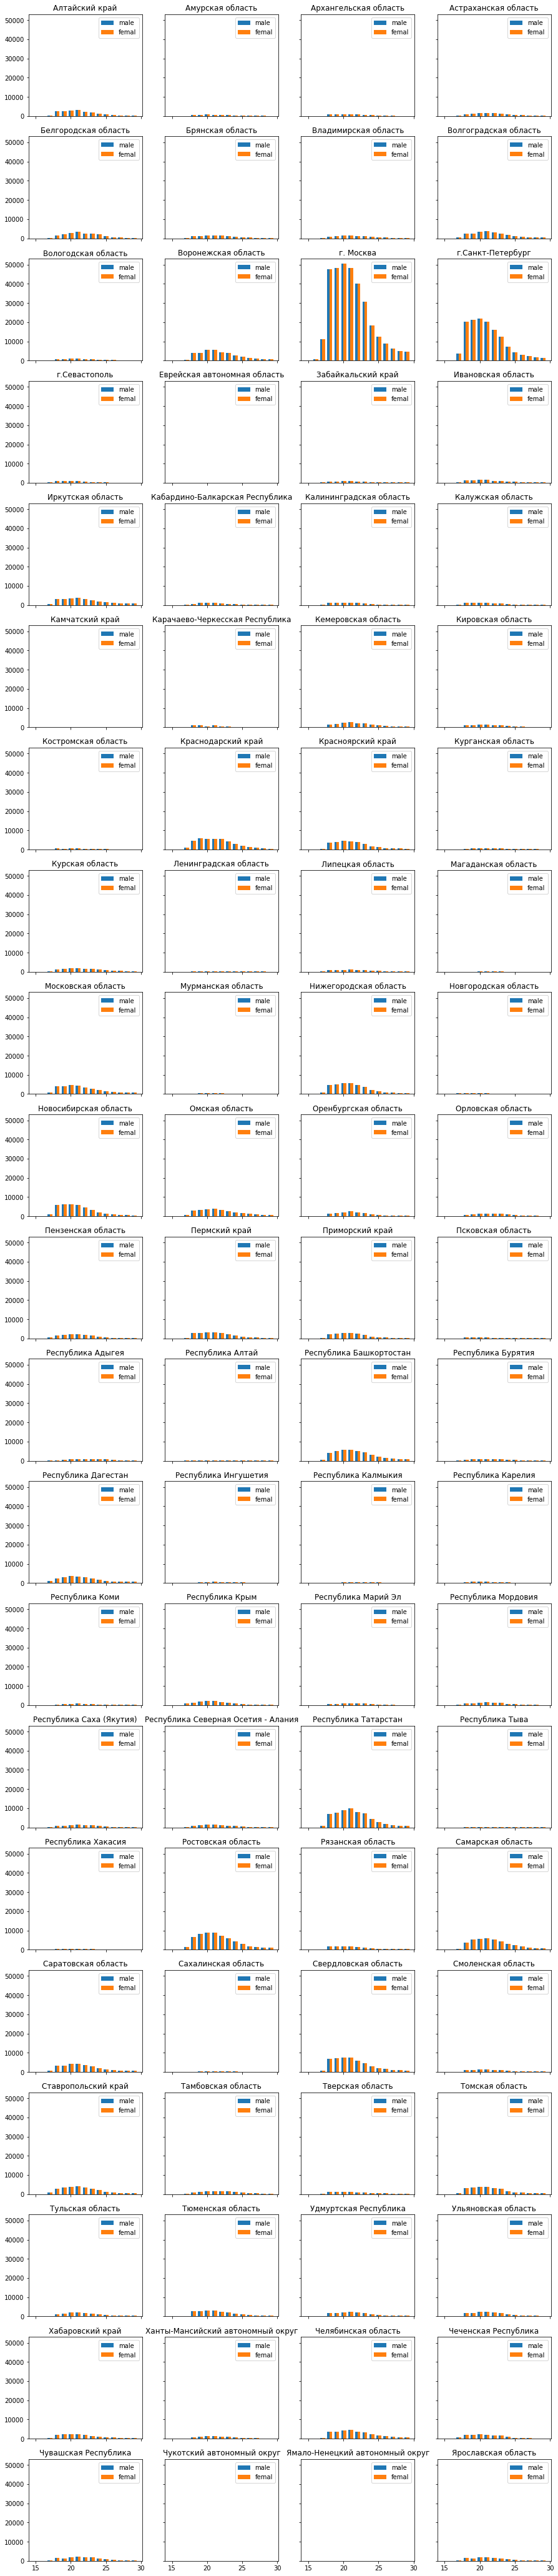

In [11]:
# plotting the distribution of the male students in each region
figure, axis = plt.subplots(21, 4,sharex=False, sharey=True,figsize=(15,75))
for i in range (1,85):
    l=int((i-1)/4)
    j=(i-1)%4
    #axis[l, j].bar(d_men.age[1:15], d_men.iloc[1:15,i])
    axis[l, j].bar(d_men.age ,d_men.iloc[:,i],align="center",width=0.6,label="male")
    axis[l, j].bar(d_men.age,d_men.iloc[:,i],align="edge" ,width=0.4,label="femal")
    axis[l, j].legend(loc ="upper right")

i=0    
for ax in axis.flat:
    ax.label_outer()
    ax.set_title(regions[i])
    i+=1

plt.show()

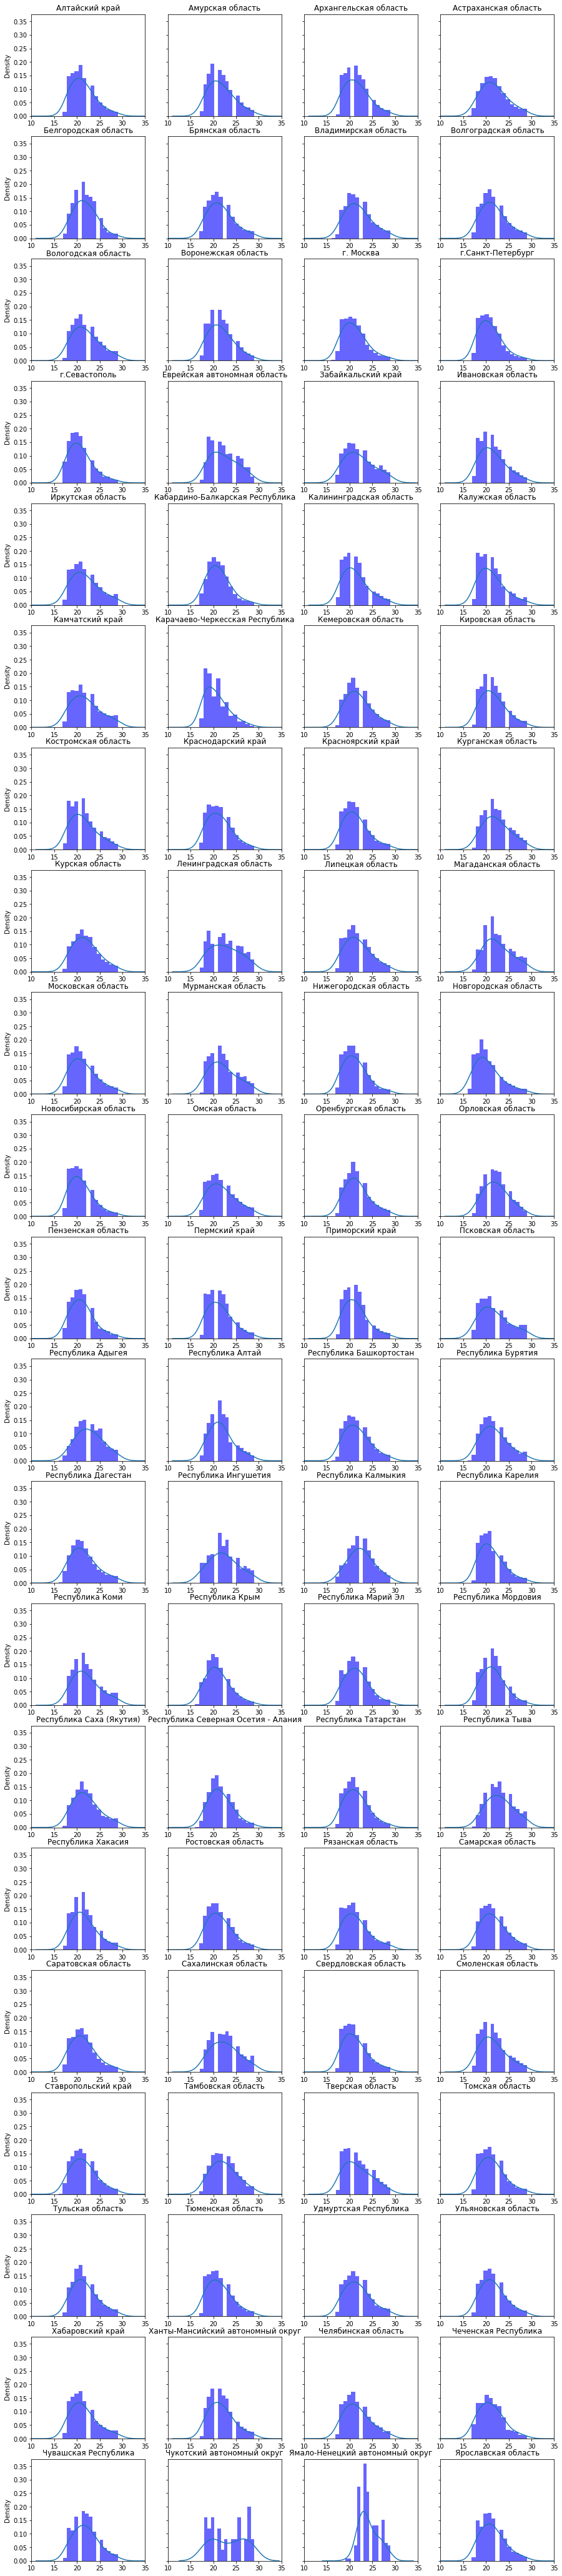

In [34]:
#plotting the density curve of male students in each region
figure, axis = plt.subplots(21, 4,sharex=False, sharey=True,figsize=(15,75))
for i in range (1,85):
    l=int((i-1)/4)
    j=(i-1)%4
    a = pd.Series(d_men.age.repeat(d_men.iloc[:,i]))
    a.plot.kde(ax=axis[l, j],bw_method=0.5)
    axis[l, j].hist(a,bins=15, density=True, alpha=0.6, color='b')
    axis[l, j].set_xlim([10, 35])

i=0    
for ax in axis.flat:
    #ax.label_outer()
    ax.set_title(regions[i])
    i+=1

plt.show()

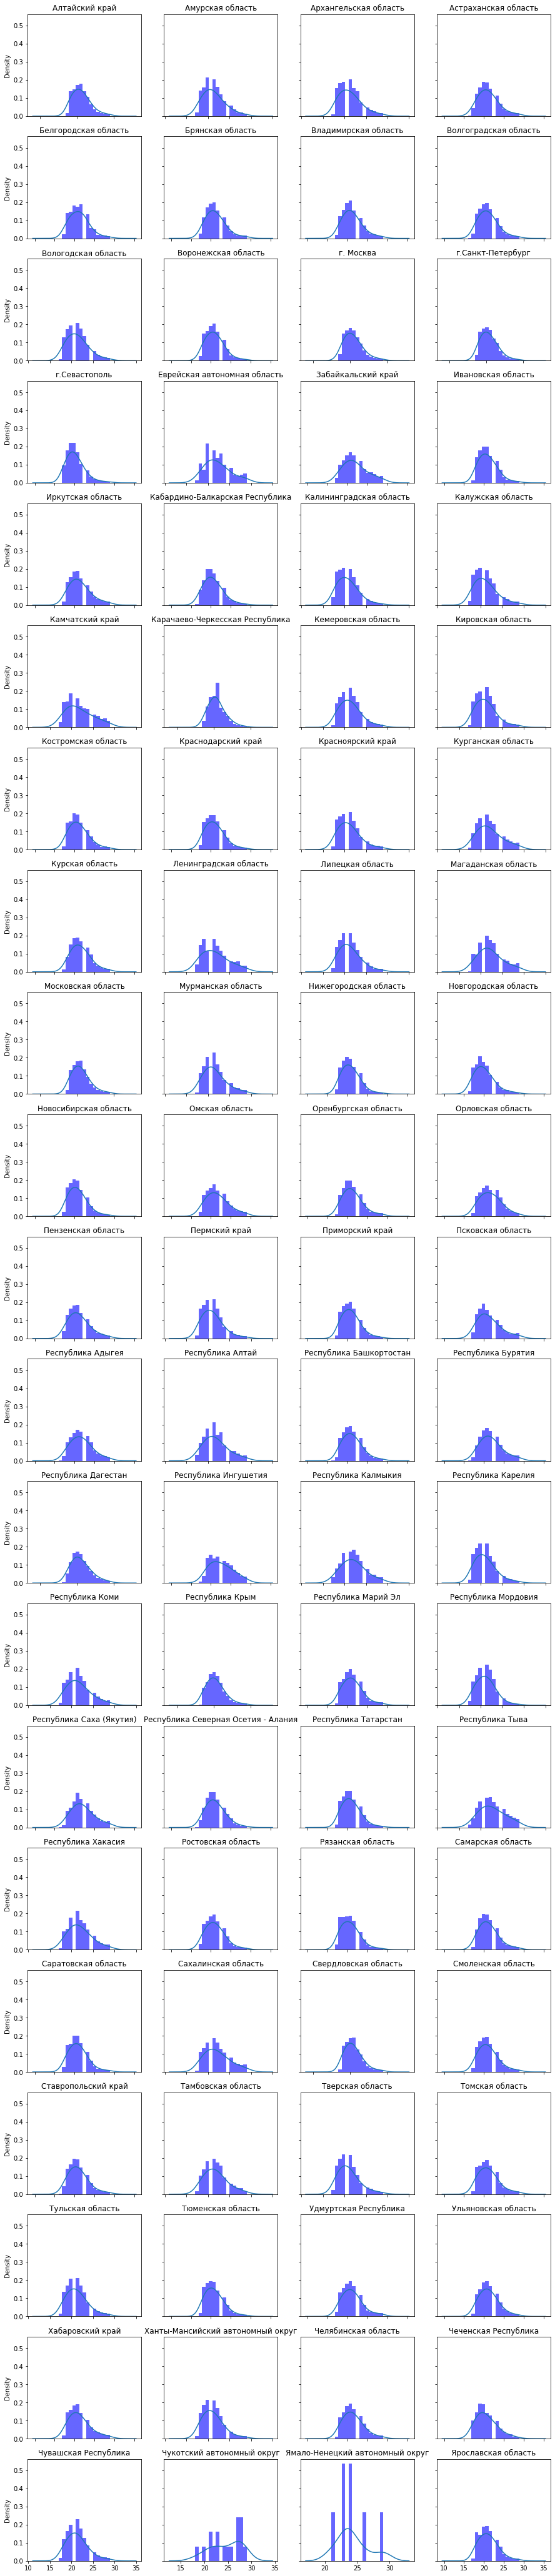

In [35]:
#plotting the density curve of female students in each region
figure, axis = plt.subplots(21, 4,sharex=False, sharey=True,figsize=(15,75))
for i in range (1,85):
    l=int((i-1)/4)
    j=(i-1)%4
    a = pd.Series(d_women.age.repeat(d_women.iloc[:,i]))
    a.plot.kde(ax=axis[l, j],bw_method=0.5)
    axis[l, j].hist(a,bins=15, density=True, alpha=0.6, color='b')

i=0    
for ax in axis.flat:
    ax.label_outer()
    ax.set_title(regions[i])
    i+=1

plt.show()